In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

### (1) First Loading the DataSet, 
### (2) Time for some network of thrones, and
### (3) Populating the network with DataFrame

#### The first and foremost thing
Here, I have combined these three parts into one making the work done in less lines and also being efficient at the same time.
I have created and array of file names called all_books_paths. This makes loading the dataset easier apart from reading each file separately. I am using networkX python library that is very efficient for studying and analyzing graphs, networks and at the same time providing various complex algorithms like different types of Centralities etc.
Creating a graph area using networkX python library for each books of GOT and creating a list of all graph to the books respectively in a list variable named all_books_net.

In [2]:
all_books_paths = ['./book1.csv', './book2.csv', './book3.csv', './book4.csv', './book5.csv']
all_books_net = []


#Adding graph area to each bookk and storing it in a list.
for book in all_books_paths:
    temp_book = pd.read_csv(book)
    book_net = nx.Graph()
    
    for not_useful , row in temp_book.iterrows():
        book_net.add_edge(row['Source'], row['Target'], weight = row['weight'])
    all_books_net.append(book_net)

### (4) The most important character in GOT

Finding the most important character in GOT can be very difficult and time-consuming after sometimes.
The most important character has to be found on several ground measures. Some factors contribute a lot to a character and increases its value drastically while on the other hand other factors can be meaningless. It is necessity and a wise step to first look at the major contributing factors.
Some Factors can be very overwhelming for a character and needs to be evaluated.
We will consider here certain factors that contributes to a character making him/her the most important :

#### 1) Eigen Vector Centrality : 
        In layman's term, Eigen vector centrality can be described as a factor that is derived from the number of connections with important people. Having connection/influence on certain people makes that character important as well. That means, a character can receive massive credits if he/she has good connections. This makes a character very versatile and crucial for the plotline of GOT.

#### 2) Degree Centrality :
        Degree Centrality is simply a factor considering the ample of connections a character has with others and it doesn't matter if the other character is important or not. Basically, this can be evaluating using the number of edges ingoing and outgoing from the character's node.

#### 3) PageRank Centrality : 
        Basically, PageRank is very similar to that of Eigen Vector Centrality. PageRank is different from Eigen Vector in very small terms, that is, it considers "the value of interaction" with other important characters. It contains a feedback loop. This takes account for how effectively does the character takes advantage of connections with important people. This is very crucial to include as value of interaction are only used during crises in the plot of the book that in turn gives major strategic story depending on the decision given by the character.
        
We will find the most important character at the end of this network analysis. But quickly using Eigen Vector Centrality and Degree Centrality, we can determine what makes the character crucial for the plot of the books.

In [3]:
all_eigen_centrality = []
all_degree_centrality = []

#Applying the two centralities to each character
try:
    for each_book in all_books_net:
        centrality1 = nx.eigenvector_centrality_numpy(each_book, tol = 0.1e-7)
        centrality2 = nx.degree_centrality(each_book)
        all_eigen_centrality.append(centrality1)
        all_degree_centrality.append(centrality2)
except:
    ec1 = eigenvector_centrality(all_books_net[0])
    ec2 = eigenvector_centrality(all_books_net[1])
    ec3 = eigenvector_centrality(all_books_net[2])
    ec4 = eigenvector_centrality(all_books_net[3])
    ec5 = eigenvector_centrality(all_books_net[4])
    all_eigen_centrality.extend([ec1, ec2, ec3, ec4, ec5])


#Sorting the centralities in descending order and getting the top 10 characters of each book    
def sortby_key(temp):
    return temp[1]

for i in range(len(all_eigen_centrality)):
    all_eigen_centrality[i] = sorted(all_eigen_centrality[i].items(), reverse = True, key = sortby_key)[:10]
    all_degree_centrality[i] = sorted(all_degree_centrality[i].items(), reverse = True, key = sortby_key)[:10]

#Taking the two centralities and converging them into a single centrality. we'll discuss later why mean is not efficient
final_centrality = []
for i in range(5):
    if all_eigen_centrality[i][0] > all_degree_centrality[i][0]:
        final_centrality.append(all_eigen_centrality[i])
    else:
        final_centrality.append(all_degree_centrality[i])

all_books_name = ['A Game of Thrones', 'A Clash Of Kings', 'A Storm Of Swords', 'A Feast For Crows', 'A Dance with Dragons']

print("The most important character from each book is : ")
for i in range (5):
    print("Book " + str(i+1) + ": " + all_books_name[i] + " -> " + str(final_centrality[i][0]))

The most important character from each book is : 
Book 1: A Game of Thrones -> ('Eddard-Stark', 0.3548387096774194)
Book 2: A Clash Of Kings -> ('Tyrion-Lannister', 0.2054263565891473)
Book 3: A Storm Of Swords -> ('Tyrion-Lannister', 0.305534387281715)
Book 4: A Feast For Crows -> ('Jaime-Lannister', 0.23443223443223443)
Book 5: A Dance with Dragons -> ('Jon-Snow', 0.1962025316455696)


### (5) The evolution of character importance

A Character can be a huge factor only after surviving and going through major plot changes. This shows how the character has evolved over the story of the books. There are around 900 character in GOT but each of them does not contribute equally to major circumstances. For relevance and short reference, we will only infer to the important characters of each book and compare them to others and themselves and see how they have improved over all the 5 books. For the character to evolve throughout the book it does not need for the character to live as long as he sets up the storyline for the upcoming events.

We see in the Data Report that Eddard Stark was the most important and influential character in the first part of the book as he sets up the plot and introduces us to the goal, characters and antagonist of the series. Throughout the boo Eddard stark shows us a dramatic decrease in evolution. That's because as the book progresses new characters with different motives and respect are introduced. This new character certainly gains importance by connecting with other people and by having major contribution in plot-changing circumstances. Tyrion Lannister is a character that is of huge importance and is the most important characters in the 2nd and third installment of the book. He is one of the prominent characters that was introduced to us in the first book, A Game of Thrones, and continued to play the character through other books continuously. The character was not introduced in the fourth book, A Feast of Crows, but still is considered very important for the story line because he os considered of great  importnace as he maintains as much impact as he was present while being abset. He molds the storyline.
The forth book's most important character is Jaime Lannister. He is firstly introduced in the first insstallment of the book and it is showsn that he belongs to one of the most wealthiest and powerful familyin the Kingdom of Westeros. Jaime Lannister plays and important role in the fourth book as he declines relationships with Cersie and the request to become the "new hand of the King". The fourth book revolves mainly around Jaime Lannister. Therefore, from the below report we analyse that Jaime Lannister becomes the center of attraction while still maintaining character's respect and determination throughout the series of books. Jon Snow is firstly introduced to us in the first book. He is one of the most popular characters in the book and is the author's finest creation and sets a masterpiece example for anyother evolution of characters. Jon Snow does not have much interactions with other new characters introduced throught the 2nd and 4th book as he is near Teh Wall. But the character plays an important role in the last installment of the series. He returns with one of the major storyline evnet.
Thus, the character evolution report generated below is most likely to be accurate when compared to the book's stroy. Thus, for evolvement purposes the character's connections with other people must be high. That is why Degree Centrality  is used to build this report as for a character to evolve, he must have relations that account even for a small increase in degree factor of the character.

Text(0, 0.5, 'Degree centrality factors')

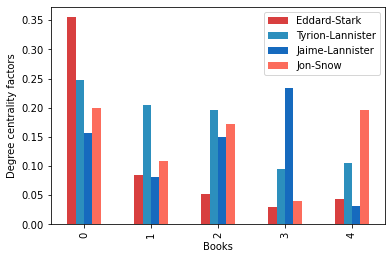

In [15]:
#Applying degree centrality to each character in the book
char_imp = []
for each_book in all_books_net:
    char_imp.append(nx.degree_centrality(each_book))

#Taking the five main characters from all 5 novels
colors = ['#D83f3f','#2c8fbd','#166abe','#fc6c5c']
ax = pd.DataFrame(char_imp)[['Eddard-Stark', 'Tyrion-Lannister', 'Jaime-Lannister', 'Jon-Snow']].plot(kind='bar', color = colors)
ax.set_xlabel('Books')
ax.set_ylabel('Degree centrality factors')

### (6) What's up with Stannis baratheon?

#### Stannis Baratheon
He is one of the most prominent and loving character throughout GOT. We see from the analysis below that we use betweennenss Centrality to see through the data of Stannis Baratheon. Betweenness Centrality basically identifies all the characters (nodes) that are positioned in the network. This means that any information or major-event would be often passed though this node. This type of nodes grants the bearer a sense of strength and the power to influence. Here we use Betweenness centrality to get furthur insights and explore the network with data and defining and analyzing certain characteristics.

From the pie report below we see that Stannis Baratheon has almost zero betweenness centrality in the first installement of the series. It maybe primarily beacuse the first book was more focused on Eddard (Ned) Stark as he develops the character base for the story. Becuase of this consuming factor and several other factors we can say that Stannis Baratheon may not be a man of importance or the man through which major-event and information wires. As the series progresses Stannis Baratheon's betweenness centrality drastically increases. This is becuase as new characters and Stannis Baratheon's scene for the hand of the king is introduced to us in the 4th book. This character becomes a high value asset for accounting event with valuable information. In the 5th part of the series, Stannis' interaction with prisoners in the book is increased and at the same time he forms a bond with melisandre while climbing the wall each night. The event where Jon Snow declines Stannis to give ownership of sixteen castles. Events like Stannis winning the support of half the forces increases value of betweenness centrality in this part of the book. Getting himself a huge part i.e. around 45% of the betweenness centrality throught the series of books.
Thus, we can say that with the proof of these events the report is correct and is analysed efficiently.

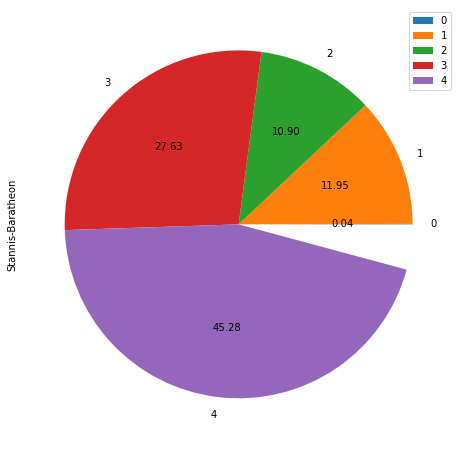

In [5]:
#Applying Betweenness centrality to each character in the book
stannis_b_imp = []
for each_book in all_books_net:
    stannis_b_imp.append(nx.betweenness_centrality(each_book))
    
#Finding a pattern and analzing what makes stannis barathreon important 
pd.DataFrame(stannis_b_imp).plot(kind='pie', y = 'Stannis-Baratheon', autopct="%0.2f", figsize=(10,8))

### (7) What does Google PangeRank tells us about GoT?

Google's PageRank algorithm is a very popular algorithm that essentially tells us how much interactions does a node, in this case, charcater have with other important nodes. it is very similar to EigenVector Centrality. The difference between both of them is that it has a feedback loop and value importance of the node is not preserved as it was done in EigenVector centrality rather the factorn is divided with oter nodes. A major story event occurs when there are some of the most influential and important character, that is, nodes are involved in the situation.
From the report below, we see that in the first book, Eddard Snow plays a very important role and has a very high centrality factor than any character in any other book. This is because the first book is generally a setup of the story and introduces us to the characters and sets the base for the events. The first part of the book evolves around Eddard Stark. Thus, we can say that Eddard Stark should have a very high PageRank centrality as he is responsible for almost every major event and indeed the report says it.
We also see that Jon Snow, Robert Barathron and Tyrion Lanister also has high centrality but not as much as Ned Stark, this is because they were the most important characters introduced by Eddard stark. Therefore their centrality factor increased and proved their value for the story in further books.
In the second book, as Jon Snow has moved towards The Wall, his importance is still relevant for the book but not as much as Tyrion Lannister and Deanerys Targeryen because down their in their kingdoms there were new events and influential plots taken place via these characters. They are hugely responsible and necessary for the story to progress in the second instalment of the book.

Further we see that Jon Snow again rises in book 3 and drops drastically in book 4 as the book proceeds to tube conclusion. Jon Snow is show as the character with highest centrality factor in book 3 but before we saw that when applied EigenVector and Degree centrality Tyrian Lannister was shown as the most important character for the 3rd book. Here we see that Tyrain is not as responsible for as many valueable interactions than Jon Snow and this proves that not all Centrality are the same. Tyrian progresses in the continuing books but the 5th book where the conclusion has drastic plots and every major character in the previous books are again called and thus their interaction increases. We say every major characters from each book that are the top 5 characters in each book has an increased centrality factor as the story comes towards conclusion. Eddard Stark does not prove to be of great importance in the last book as he died previously but stil does has it factor drop to zero. This shows that he still has an impact some way or the other in the story conclusion plot.

Text(0, 0.5, 'PG centrality factors')

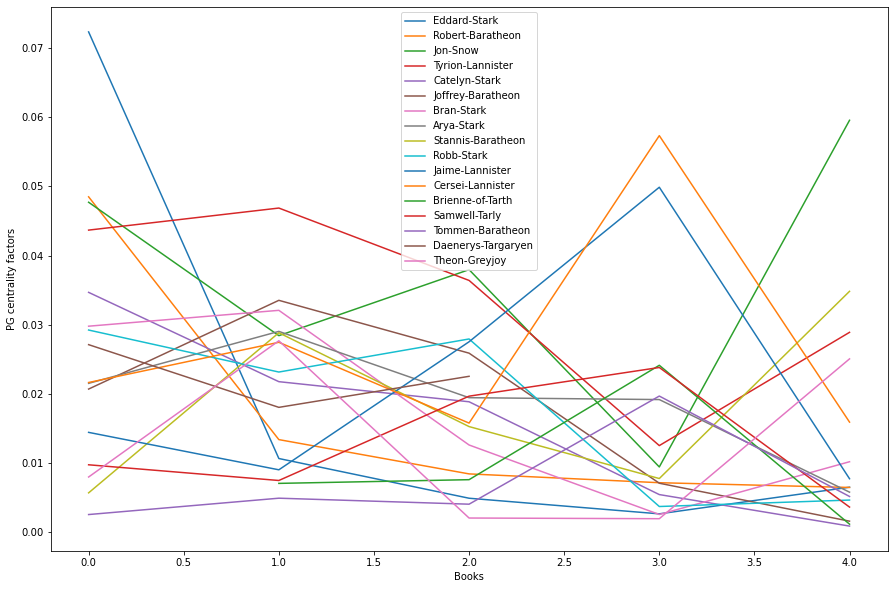

In [14]:
#applying PageRank centrality to each characters
char_ranking = []
for each_book in all_books_net:
    char_ranking.append(nx.pagerank(each_book))

main_char_df = pd.DataFrame(char_ranking)

def remove_duplicates(arr):
    unique_list = []
    for element in arr:
        if element not in unique_list:
            unique_list.append(element)
    return unique_list

#Sorting the factors in descending order taking first 5 valuea and at the same time removing duplicate values
main_char = []
for i in range(5):
    main_char.extend(list(main_char_df.T[i].sort_values(ascending=False)[:5].index))

main_char = remove_duplicates(main_char)
ax = main_char_df[main_char].plot(figsize=(15,10))
ax.set_xlabel('Books')
ax.set_ylabel('PG centrality factors')

### (8) Correlation between different measures

At last we say that each centrality has a very different impact on each of the characters. But to find the most important character from all the books, we first need to know how each of the factor are affected. In other terms we need to find a number k that will show how a certain centrality factor is proportional to each other. This means we need to find a certain correlation between these factors and also at the same time we also need to find these four correlation for each of the major characters.
Here the columns are represented as follows :
0 : PageRank centrality
1 : EigenVector centrality
2 : Degree centrality
3 : Betweenness centrality

NOTE : I did not show these relations for each book because after certain iterations of EigenVector Centrlaity, it reaches PowerIterationFailed Exception. This abstractly shows that it could not redcue the error margin as it stucked into an infintie lkop or could not reduce the error margin.

We see from the bar graph in the analysis below that value of y axis for each factor gives us the proportionalilty constant and shows how much does it depend on each other.We eliminated the diagonal from the correlation pattern as the diagonal, that is, the proportionality constant against the same centrality factor will always be one, thus 1. Therefore eleminate the diagnal rows from the corr_pattern.
It Shows us that EigenVector and Pagerank centrality has the highest correlation constant as it is the most nearest value to 1 of all the other valuesthis is because EigenVector and PageRank Centrality are almost same as we reviewed before. We also see that this proportionality correlation set always follows commutative property because the diagonal is the symmetry line for all the remaining elements to the other side. We also see that the correlation between Degree and Betweenness centrality is very low and it is a valid conclusion because while degree centrality just accounts for the number of ingoing and outgoing edges from the node, the Berweenness centrality accounts for the node that helps to connect, in this case, communities and storyline. Also Stannis Baratheon as we have seen before holds for the highest betweenness centrality accounts for connecting the network of GOT.

We also see how major characters has a centrality factors very distinct. Below is the report only for the first book, Eddard Stark has a very high pagerank centrality than any other centralities as we had discussed Eddark Stark in a way sets up the character and storyline for furthur continuation in the story. This makes his interaction to with others makes the connecting node more important as he is the warden of the north and is one of the wealthiest and influential family in whole GOT. Every other character have their own features making a huge contribution in the story.

All centrality factors of all major characters : 

   Eddard-Stark  Tyrion-Lannister  Jon-Snow  Jaime-Lannister  \
0      0.072362          0.043676  0.047708         0.014403   
1      0.296409          0.225204  0.170460         0.194958   
2      0.354839          0.247312  0.198925         0.155914   
3      0.269604          0.190212  0.171581         0.032010   

   Stannis-Baratheon  Bran-Stark  Cersei-Lannister  Daenerys-Targaryen  
0           0.005650    0.029770          0.021620            0.027099  
1           0.109452    0.193772          0.216433            0.047389  
2           0.064516    0.172043          0.161290            0.112903  
3           0.000443    0.055800          0.026435            0.086270  
-----------------------------------------------

Finding the constant k responsible for proportionality w.r.t to each centrality factor

          0         1         2         3
0  1.000000  0.813559  0.949258  0.935354
1  0.813559  1.000000  0.930315  0.664590


Text(0, 0.5, 'Proportionality constant')

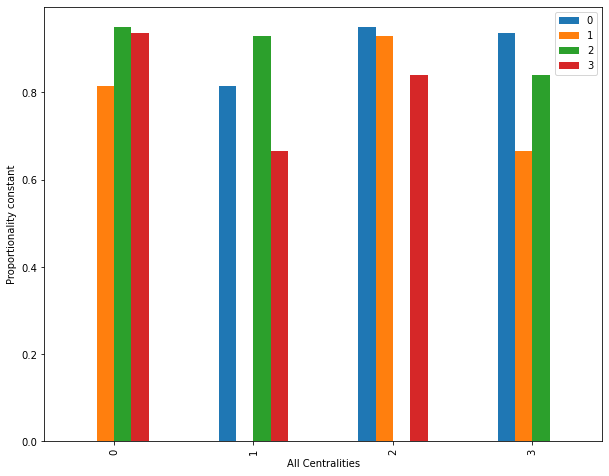

In [13]:
correlation_df = pd.DataFrame([nx.pagerank(all_books_net[0]), nx.eigenvector_centrality(all_books_net[0]),nx.degree_centrality(all_books_net[0]), nx.betweenness_centrality(all_books_net[0])])

print("All centrality factors of all major characters : \n")
print(correlation_df[["Eddard-Stark","Tyrion-Lannister","Jon-Snow","Jaime-Lannister","Stannis-Baratheon","Bran-Stark","Cersei-Lannister","Daenerys-Targaryen"]])

print("-----------------------------------------------")

print("\nFinding the constant k responsible for proportionality w.r.t to each centrality factor\n")
corr_pattern = correlation_df.T.corr()
print(corr_pattern)
ax = corr_pattern[ corr_pattern != 1 ].plot(kind='bar', figsize=(10,8))
ax.set_xlabel('All Centralities')
ax.set_ylabel('Proportionality constant')

#### (9) Conclusion

Out of all available centralities, we use PageRank centrality as conclusion because this centrality makes a node accountable for major events etc. in the story plot. We could use all the 4 four centralities and optimise it by giving it a mean value. but as we have seen in the previous correlation table, all the centralities does not have a proportionality constant of 1 and rather has variable constant. This makes taking the mean of all four centralities very inefficient as it dampens the charactersitics of high accountable factors and abruptly increases the low accountable factors in certain parts of the book. Thus, we take the centrality factor that is the most accountable for story and character evolution.

We see that in the 1st book, Eddard Stark as usual holds the most influential character. Further down the series Tyrian Lannister, Jon Snow and Jaime Lannister are most accountable for the major story events. In the fourth book, we can see that Jon Snow has a very low influential rate compared to other books. This is not to be misinterpreted. This does not mean that Jon Snow is not an important character. It maybe because in the fourth book, there must be a very low rate of appearance or interaction with Jon Snow to other characters. We can soon see that Jon Snow is the man of importance in the last book. We also hold account shares for each major character in each books. The value of share increases as the books proceeds to the conclusion. This can be interpreted truly because the story progresses the characters importance must be high for that character to be the most important character.

If we increase the value of character with the following percentages as the story progresses.
1st Book : 5% increase in the first book for each character because the characters introduced in the first book can be dessimitated further or even can become more influential, we can never know.

2nd Book : 10% increase in the second book for each character.

3rd Book : 15% increase in the third book for each character.

4th Book : 20% increase in the fourth book for each character. this is a major increase than all because from now onwards the characters have evolved drastoically and they have gained influence on other people over the story.

5th Book : 25% increase in the fifth book for each character. This is very necpessary becauase for the conclusion of the story, the characters are well evolved from their experiences in the previous books. This means that all the major characters will now have an increased value and will contribute themselves as the huge asset for the end of the story.

From this analysis and furthur adding these value of shares to each major character in each book. We can get our final answer.

We see that <b>Stannis-Baratheon</b> is the character through which most information and major events passes as the book progresses towards a solution.

<b>Jaime Lannister</b> is the fourth important character for the books.<br>
<b>Eddard Stark</b> is the third important character for the books.<br>
<b>Tyrian Lannister</b> is the second most important character for the books.<br>
#### <b><i>Jon Snow</i></b> is the most important character throughout the series.

Text(0, 0.5, 'PG centrality factors')

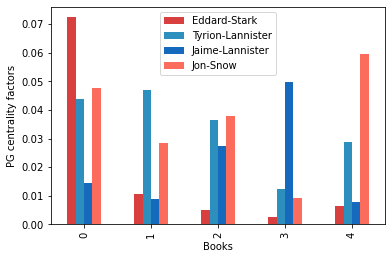

In [12]:
char_imp = []
for each_book in all_books_net:
    char_imp.append(nx.pagerank(each_book))
    
    
colors = ['#D83f3f','#2c8fbd','#166abe','#fc6c5c']
ax = pd.DataFrame(char_imp)[['Eddard-Stark', 'Tyrion-Lannister', 'Jaime-Lannister', 'Jon-Snow']].plot(kind='bar', color = colors)
ax.set_xlabel('Books')
ax.set_ylabel('PG centrality factors')